# Authors: Aishwarya Mathew, Vikram Yabannavar

# SPAMIFIER

## References

1. Kaggle: [https://www.kaggle.com/](https://www.kaggle.com/)

## Introduction

Data science is all around us. It is an interdisciplinary field of study that strives to discover meaning behind data. Finding a good first data science project to work on is a hard task. You may know a lot of data science concepts but you get stuck when you want to apply your skills to real world tasks. However, you've come to the right place! Have you ever wanted to make an application that could distinguish between some bad thing and a good thing? This tutorial will do just that. It's actually a basic introduction to the world of data science. This project will teach you how to perform text classification by creating a spam classifier/filter that will distinguish between spam vs. not spam (we call this ham) SMS messages and emails. We will take you through the entire data science lifecycle which includes data collection, data processing, exploratory data analysis and visualization, analysis, hypothesis testing, machine learning and insight/policy decision.

### Tutorial Content

This tutorial will go over the following topics:

1. [Installing Libraries](#libraries)
<br>
2. [Loading Data](#load data)
<br>
3. [Processing Data](#process data)
<br>
4. [Exploratory Analysis and Data Visualization](#eda)
<br>
   4.1. [Getting The Top 100 Words in Spam Messages](#spam1)
<br>
   4.2. [Getting The Top 100 Words in Ham Messages](#spam1)

<a id='libraries'></a>
## Installing Libraries

In [132]:
import pandas as pd
import csv
import re
import string
import pytagcloud
import matplotlib.pyplot as plt
import numpy as np

<a id='load data'></a>
## Loading Data (Data Collection)

The first step of any data science project is data collection. Kaggle is a dataset website that has a lot of real world data. To get started, you need to click on this link, https://www.kaggle.com/uciml/sms-spam-collection-dataset , to download the SMS spam vs. ham dataset from Kaggle to your local disk. You will have to create a user account on Kaggle to download any of their datasets. For email data, we will use the dataset provided from Andrew Ng's Machine Learning course at Stanford. That data can be found [here](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex6materials/ex6DataEmails.zip).

<a id='process data'></a>
## Processing Data

Once you have the dataset (a csv file) on your local server, we can start the next step, in which, we prepare our data. The code below is going to export the spam vs. ham dataset from the local server to a pandas dataframe. 

In [133]:
#reading the data into a pandas dataframe
spamham_data = pd.read_csv("sms.csv", encoding='latin-1')

#removing unnecessary columns
del spamham_data['Unnamed: 2']
del spamham_data['Unnamed: 3']
del spamham_data['Unnamed: 4']
#renaming the remaining two columns
spamham_data.columns = ['Spam or Ham','SMS Message']

#the resulting dataframe with our data
spamham_data.head()

### Check for missing values

,Spam or Ham,SMS Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id='eda'></a>
## Exploratory Analysis and Data Visualization

### Getting The Top 100 Words in Spam SMS Messages

### First we get the top 15 words in spam SMS messages

##### Getting the Counts

In [134]:
spam_words = {} #dictionaries of word -> num occurrences
ham_words = {}

translator= str.maketrans('','',string.punctuation) #for stripping punctuation

# We tokenize the words. We strip punctuation but do not convert to lowercase,
# so Free, free, and FREE are all going to be different for our purposes.
# If a word isn't in dictionary, we add it with default value 1,
# else, increment the corresponding count.

for item,row in spamham_data.iterrows():
    line = row['SMS Message'].translate(translator) #remove punctuation
    line = line.split() #convert lowercase and split by space
    for word in line:
        if row['Spam or Ham'] == 'spam':
            if word in spam_words:
                spam_words[word] = spam_words[word] + 1
            else:
                spam_words[word] = 1
        else: #if ham
            if word in ham_words:
                ham_words[word] = ham_words[word] + 1
            else:
                ham_words[word] = 1


SMS_spam_df = pd.DataFrame.from_dict(spam_words,orient='index')
SMS_spam_df.columns = ['count']
SMS_spam_df.head()

,count
TsCs087147403231WinawkAge16,2
Phoenix,2
30s,1
84025,3
Wet,1


##### Printing Top 15 

In [135]:
SMS_spam_df['count'].nlargest(15)

to      608
a       358
call    189
your    187
or      185
you     185
the     178
2       173
for     170
is      149
on      138
Call    137
now     131
have    128
4       119
Name: count, dtype: int64

### Getting The Top 15 Words in Ham SMS Messages

##### Getting the Counts

In [136]:
SMS_ham_df = pd.DataFrame.from_dict(ham_words,orient='index')
SMS_ham_df.columns = ['count']
SMS_ham_df.head()

,count
dresser,3
resuming,1
TAKE,2
STUDENTFINANCIAL,1
marandratha,1


##### Showing the Top 15

In [137]:
SMS_ham_df['count'].nlargest(15)

you    1624
to     1540
I      1448
the    1021
a       971
in      759
and     740
i       737
u       716
me      701
is      656
my      620
it      518
of      504
for     480
Name: count, dtype: int64

Now that we've found the most common words in spam and non-spam SMS messages, we notice that many of the words are similar since words such as 'u','and', and 'the' are common between both. From here, we find the words most commonly used only in spam SMS messages.

### Finding words only in spam SMS messages

#### Getting sets of all words in each Dataframe

In [138]:
ham_set = set([ line for line in SMS_ham_df.index])
spam_set = set([ line for line in SMS_spam_df.index])

#### Doing set difference to get the words found in spam and not in ham

In [139]:
only_SMS_spam_set = spam_set.difference(ham_set)

#### Filtering the DataFrame

In [140]:
#This only contains the words used by spammers
only_SMS_spam_df = SMS_spam_df.ix[only_SMS_spam_set]
only_SMS_spam_df.head()

,count
TsCs087147403231WinawkAge16,2
Phoenix,2
30s,1
84025,3
Wet,1


#### 15 most common words only used in spam SMS messages

In [141]:
sms_largest = only_SMS_spam_df['count'].nlargest(15)
sms_largest

claim         78
prize         73
won           49
18            43
URGENT        41
awarded       37
å£1000        35
150ppm        32
Claim         32
å£2000        31
TCs           29
PO            28
å£150         27
guaranteed    26
tone          26
Name: count, dtype: int64

### Visualizing The Data

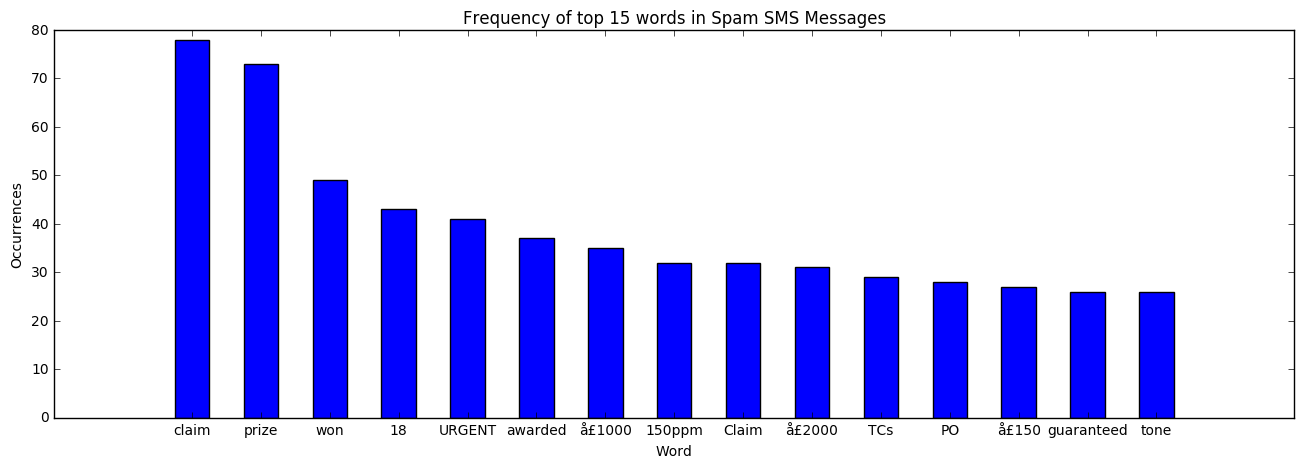

In [142]:
graph_x = list(sms_largest.index)
graph_y = list(sms_largest.get_values())
ind = np.arange(len(graph_x))
plt.figure(figsize=(16,5))
plt.bar(ind,graph_y,width=0.5,align='center',alpha=1.0)
plt.xticks(ind,graph_x)
plt.xlabel('Word')
plt.ylabel('Occurrences')
plt.title('Frequency of top 15 words in Spam SMS Messages')
plt.show()

Through these transformations, we can conclude that text messages containing words relating to winning prizes or monetary values/symbols have a high likelihood of being a spam text message. The word 'prize' is the highest occurring word in the spam text messages, with 113 occurrences while the next three words are also related to winning or prizes. There also seem to be a trend of poor spacing or non-phonetic combinations of letters and numbers, which are common signs of spam messaging.  Next we will do the same analysis on emails. 

## Looking at Emails 

We're using data from Andrew Ng's Machine Learning course, which splits the data into training sets and test sets. Since we aren't training on the data yet, we've created a script (included in the GitHub repo) that combines all of these into a convenient CSV for reading into a pandas dataframe. 

In [143]:
#reading the data into a pandas dataframe
email_spamham_data = pd.read_csv("email.csv", encoding='latin-1')

#renaming the two columns
email_spamham_data.columns = ['Spam or Ham','Email']

email_spamham_data.head()

,Spam or Ham,Email
0,spam,great parttime summer job display box credit a...
1,spam,auto insurance rate too high dear nlpeople m s...
2,spam,want best economical hunt vacation life want b...
3,spam,email million million email addresses want mon...
4,spam,amaze world record sex attention warn adult wa...


### Getting The Top 15 Words in Ham and Spam Emails

#### 15 most common words in Spam emails

In [144]:
spam_words = {} #dictionaries of word -> num occurrences
ham_words = {}

translator= str.maketrans('','',string.punctuation) #for stripping punctuation

# We tokenize the words. We strip punctuation but do not convert to lowercase,
# so Free, free, and FREE are all going to be different for our purposes.
# If a word isn't in dictionary, we add it with default value 1,
# else, increment the corresponding count.

for item,row in email_spamham_data.iterrows():
    line = row['Email'].translate(translator) #remove punctuation
    line = line.split() #convert lowercase and split by space
    for word in line:
        if row['Spam or Ham'] == 'spam':
            if word in spam_words:
                spam_words[word] = spam_words[word] + 1
            else:
                spam_words[word] = 1
        else: #if ham
            if word in ham_words:
                ham_words[word] = ham_words[word] + 1
            else:
                ham_words[word] = 1


email_spam_df = pd.DataFrame.from_dict(spam_words,orient='index')
email_spam_df.columns = ['count']
email_spam_df.head()

,count
micro,11
dresser,1
wordpad,1
fl,26
woul,1


#### Printing the top 15

In [145]:
email_spam_df['count'].nlargest(15)

email      1754
s          1572
order      1502
report     1315
address    1300
our        1183
mail       1173
program    1046
send       1032
free        953
list        942
receive     887
money       873
name        871
d           841
Name: count, dtype: int64

### Getting The Top 15 Words in non-spam emails

In [146]:
email_ham_df = pd.DataFrame.from_dict(ham_words,orient='index')
email_ham_df.columns = ['count']
email_ham_df.head()

,count
attachment,8
talana,7
micro,1
marina,8
consultant,5


#### Printing the words

In [147]:
email_ham_df['count'].nlargest(15)

language       1525
university     1268
s               878
linguistic      660
de              569
information     540
conference      495
workshop        479
english         477
e               420
email           418
one             398
paper           395
please          371
include         368
Name: count, dtype: int64

### Finding Words Only In Spam Emails

#### Getting sets of all words in each Dataframe

In [148]:
ham_set = set([ line for line in email_ham_df.index])
spam_set = set([ line for line in email_spam_df.index])

#### Doing set difference to get the words found in spam and not in ham

In [149]:
only_email_spam_set = spam_set.difference(ham_set)

#### Filtering the DataFrame

In [150]:
#This only contains the words used by spammers
only_email_spam_df = email_spam_df.ix[only_email_spam_set]
only_email_spam_df.head()

,count
marcap,1
investmentand,1
cdroms,1
underpaid,1
djs,11


In [151]:
email_largest = only_email_spam_df['count'].nlargest(15)
email_largest

nbsp          196
capitalfm     196
ffa           183
floodgate     150
aol           133
bonus         119
investment    118
mailing       118
profit        111
hundred        95
reports        93
stealth        82
links          82
always         75
millions       75
Name: count, dtype: int64

### Visualizing The Data

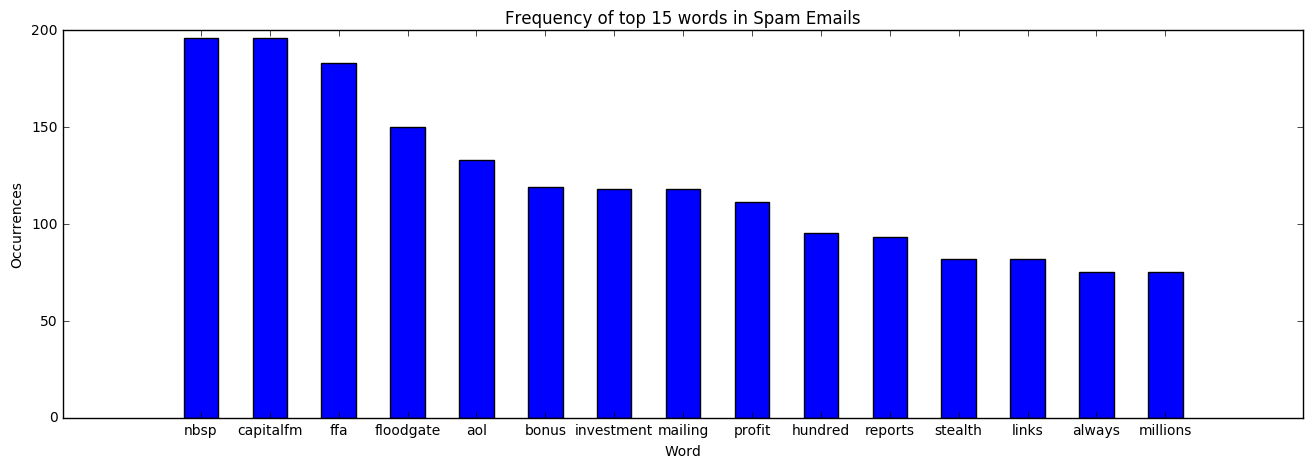

In [157]:
graph_x = list(email_largest.index)
graph_y = list(email_largest.get_values())
ind = np.arange(len(graph_x))
plt.figure(figsize=(16,5))
plt.bar(ind,graph_y,width=0.5,align='center',alpha=1.0)
plt.xticks(ind,graph_x)
plt.xlabel('Word')
plt.ylabel('Occurrences')
plt.title('Frequency of top 15 words in Spam Emails')
plt.show()

Through the transformations on email data, we can determine that there are fewer references to money—though 'investment' and 'millions' still made the list—and fewer shorthand acronyms.

## Finding the Most Common Words Across Spam Email and Spam SMS

So far, we've found the common words on SMS and email, respectively. Now, we are going to determine which words are most commonly used in both spam messages and spam emails. 

In [153]:
#creating sets of the data and doing set intersection to get common words
email_spam = set([ line for line in only_email_spam_df.index])
SMS_spam = set([ line for line in only_SMS_spam_df.index])
common_words_set = email_spam.intersection(SMS_spam)

In [154]:
common = {}
#creating a dict of the frequencies
for word in common_words_set:
    count = 0
    count = only_email_spam_df.ix[word]['count'] + only_SMS_spam_df.ix[word]['count']
    common[word] = count

#using the dict to make a DataFrame so it's easier to view
common_words_df = pd.DataFrame.from_dict(common,orient='index')
common_words_df.columns = ['count']
common_words_df.head()

,count
dating,17
hotels,3
records,6
bundle,11
charged,12


#### Top 15 Words In Both Email and SMS Spam

In [158]:
common_largest = common_words_df['count'].nlargest(15)
common_largest

bonus          121
guaranteed      66
won             52
marketing       48
unsubscribe     43
amazing         31
largest         30
upgrade         28
stamped         21
rental          21
premium         19
tips            19
newest          18
fraction        18
dating          17
Name: count, dtype: int64

### Graphing The Data

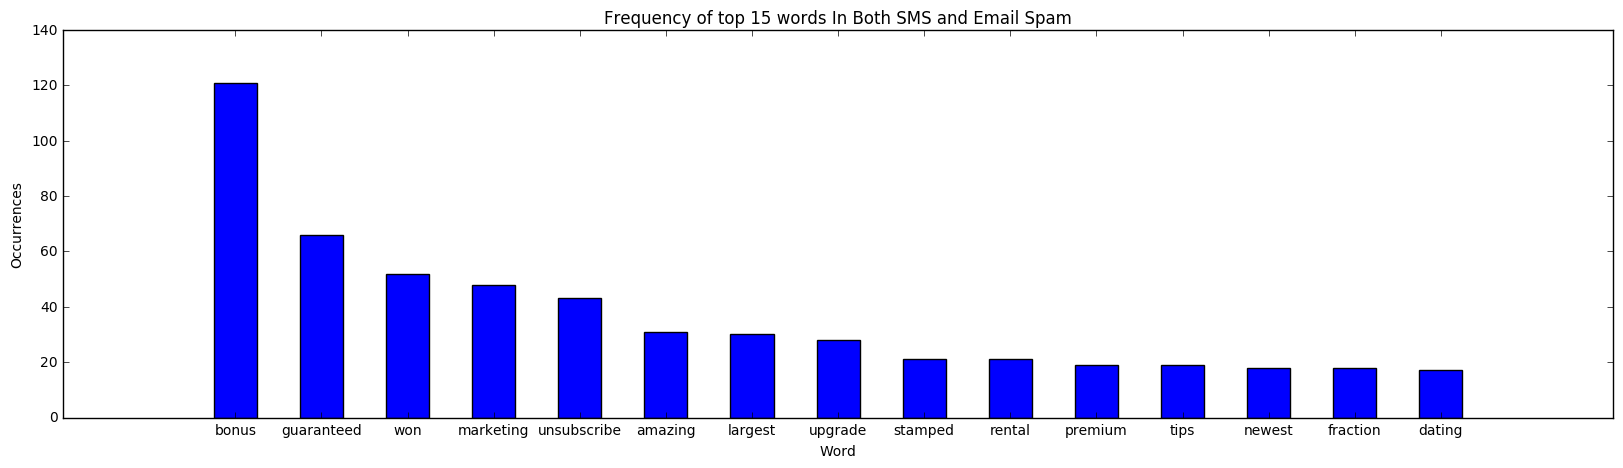

In [163]:
graph_x = list(common_largest.index)
graph_y = list(common_largest.get_values())
ind = np.arange(len(graph_x))
plt.figure(figsize=(20,5))
plt.bar(ind,graph_y,width=0.5,align='center',alpha=1.0)
plt.xticks(ind,graph_x)
plt.xlabel('Word')
plt.ylabel('Occurrences')
plt.title('Frequency of top 15 words In Both SMS and Email Spam')
plt.show()

In [156]:
#from pytagcloud import create_tag_image, make_tags
#from pytagcloud.lang.counter import get_tag_counts

#YOUR_TEXT = "A tag cloud is a visual representation for text data, typically\
#used to depict keyword metadata on websites, or to visualize free form text."


#creating a dictionary of the text
#tags = {}

#test = spamham_data.loc[spamham_data['Spam or Ham'] == 'spam']['SMS Message']
    


#tags = make_tags(get_tag_counts(YOUR_TEXT), maxsize=120)

#create_tag_image(tags, 'cloud_large.png', size=(900, 600), fontname='Lobster')